In [1]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import *
import pandas as pd
from cca import Cca as cca
import numpy as np
import tca 
import ascr
from plot_confusion_matrix import *
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
file_path1='./data/sample.csv'
file_path2='./data/sample.csv'
#train_sample = pd.read_csv(file_path1)

train_sample=pd.read_csv(file_path1).sample(frac=0.02,replace=True, random_state=9, axis=0)
xs=train_sample.loc[:,'S1':'S6']
xt=train_sample.loc[:,'T1':'T6']
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(
    np.append(xs,xt,axis = 1) ,
    pd.concat([train_sample[['S_Y']], train_sample[['T_Y']]], axis=1, join='inner').values,
    test_size=0.2, 
    random_state=9)
x_src = x_train_st[:, 0:6]
x_tar = x_train_st[:, 6:12]
y_src=y_train_st[:, 0:1]
y_tar=y_train_st[:, 1:2]
x_tar_o= x_test_st[:, 6:12]
y_tar_o=y_test_st[:, 1:2]


my_tca = tca.TCA(dim=6)
x_src_tca, x_tar_tca, x_tar_o_tca = my_tca.fit_transform(x_src, x_tar,x_tar_o) 

c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [2]:
x_tar_o_tca=x_tar_o_tca.real

In [3]:

y_tar_o_pre,acc_tar_o,y_tar_o_pre,kappa_tar = my_tca.classify_svm(x_src_tca, y_src, x_tar_o_tca, y_tar_o)


print('SVM',acc_tar_o,kappa_tar)
#
dr = tree.DecisionTreeClassifier()
dr = dr.fit(x_src_tca, y_src)
print('决策树',metrics.accuracy_score(y_tar_o, dr.predict(x_tar_o_tca)),
          metrics.cohen_kappa_score(y_tar_o,dr.predict(x_tar_o_tca)))
#  
from sklearn.neural_network import MLPClassifier
for i in ('sgd','adam','lbfgs'):
    nn = MLPClassifier(solver=i, alpha=1e-5,hidden_layer_sizes=(6, 6), random_state=0)
    nn = nn.fit(x_src_tca, y_src)
    print(i,'NN',metrics.accuracy_score(y_tar_o, nn.predict(x_tar_o_tca)),
          metrics.cohen_kappa_score(y_tar_o, nn.predict(x_tar_o_tca))) 

c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM 0.521551724137931 0.13670801206838767
决策树 0.28448275862068967 0.04237119554406199
sgd NN 0.5086206896551724 0.0


c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adam NN 0.5086206896551724 0.0
lbfgs NN 0.5086206896551724 0.0


c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
confusion_matrix(y_tar_o, nn.predict(x_tar_o_tca))

array([[  0,   0,   0,   0,   0,   0,  11,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,  10,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0,   0,   0,   0,   0,  31,   0,   0],
       [  0,   0,   0,   0,   0,   0, 118,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,  30,   0,   0]], dtype=int64)

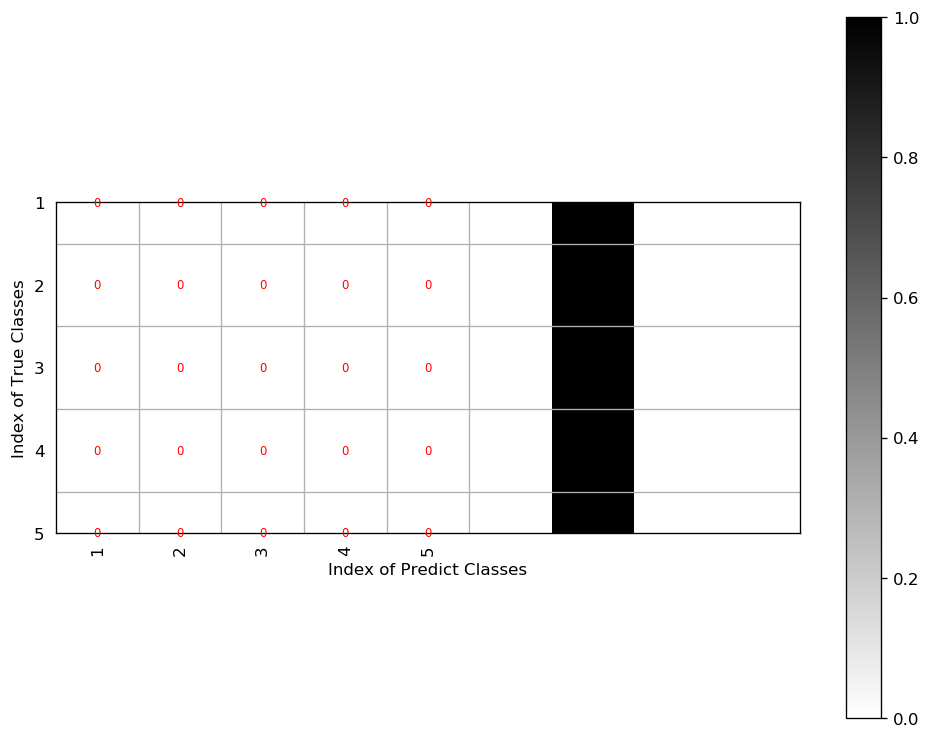

In [5]:
plot_confusion_matrix(y_tar_o, nn.predict(x_tar_o_tca),('1','2','3','4','5'))